# Modelisation of the Thermal Noise

In [13]:
from pylayers.signal.bsignal import *
from pylayers.signal.ED import *
%matplotlib inline

The bsignal module has a dedicated class for handling noise signal. To create a white noise just type : 

In [14]:
w = Noise()

The representation of the noise object provides information about default values. In digital representation of noise the sampling frequency is important. The noise signal is generated from a time $t_i$ to a time $t_f = t_i+T$. The default power spectral density is $-174dBm/Hz$ and can be modified with the argument `PSDdBmpHz`.

In [15]:
w

Sampling frequency : 50 GHz
ti  : 0ns 
tf  : 100ns 
ts  : 0.02ns 
N   : 5000
-------------
DSP : -174 dBm/Hz
    : 3.98107170553e-21 Joules
-------------
Noise Figure : 0 dB
Vrms : 9.97631157484e-05 Volts
Variance : 9.9270463046e-09 V^2
Power (dBm) /50 Ohms : -157.010299957 dBm
Power realized /50 Ohms : -157.021499567 dBm

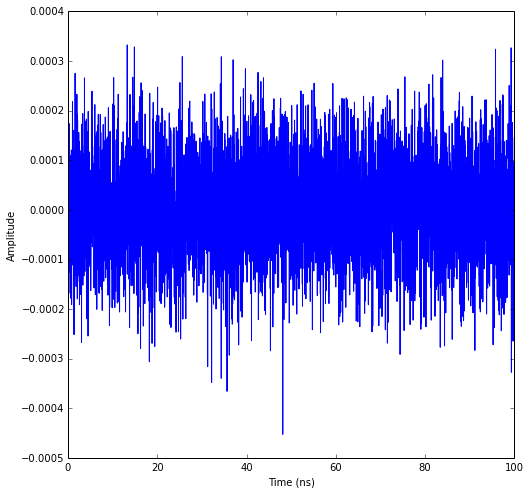

In [16]:
f,a=w.plot(typ='v')

In [17]:
w.psd()

FUsignal :  (2500,)  (2500,) 
Frequency (GHz) : 2500

In [18]:
w2 = w.fgating(fcGHz=4,BGHz=3)

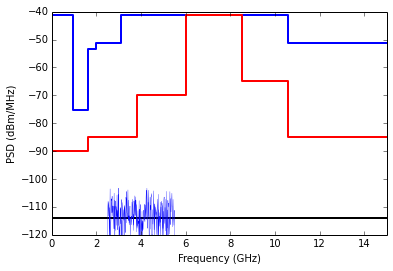

In [19]:
W2=w2.psd()
W2.plotdB(mask=True)

(<matplotlib.figure.Figure at 0x7f3e3ec57350>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f3e3e9a4a90>]], dtype=object))

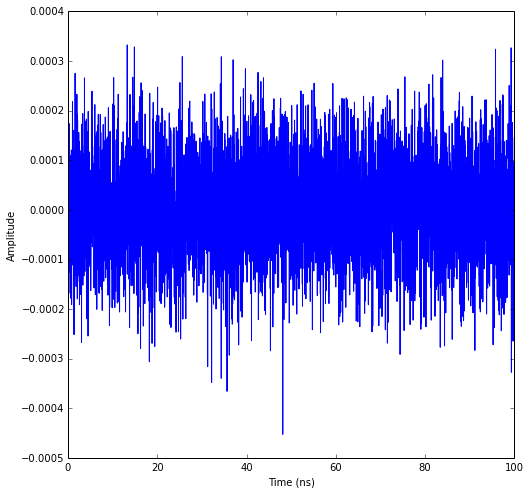

In [20]:
w.plot(typ='v')

In [21]:
ip=EnImpulse(fe=100)

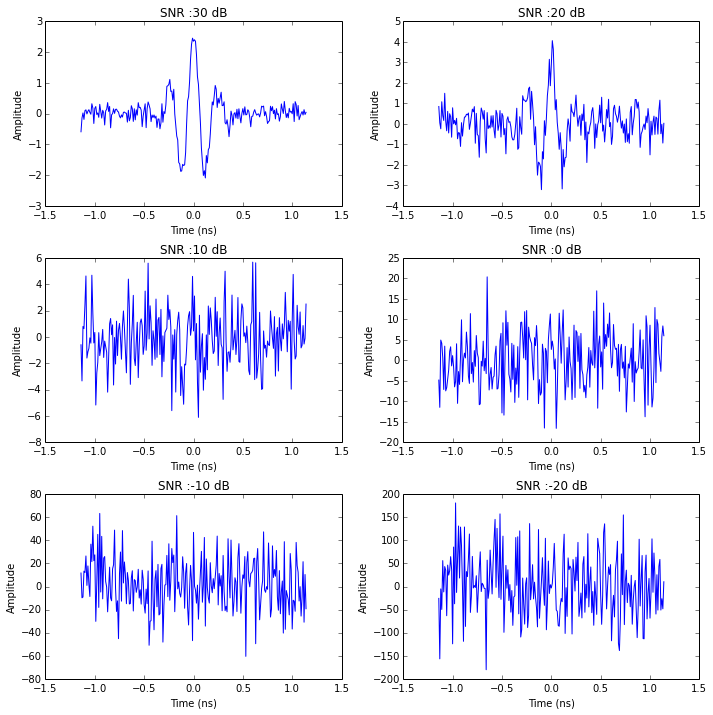

In [22]:
fig = plt.figure(figsize=(10,10))
for k,snr in enumerate(range(30,-30,-10)):
    a = fig.add_subplot(3,2,k+1)
    ipn=ip.awgn(snr=snr,typ='snr')
    ipn.plot(typ='v',fig=fig,ax=a)
    a.set_title('SNR :'+str(snr)+' dB')
plt.tight_layout()

In [25]:
EnDet=ED() 

In [26]:
EnDet

Energy Detector
---------------
Bandwidth 3GHz 
Integration Time 10 ns 
Mean (y) : 1.12727654056 nJ 
Std(y) : 0.299816717812 nJ 
Order 28.2734784778  
Scale 3.98704581554e-11  
2BT :60 

In [ ]:
F=EnDet.filterB

In [ ]:
o=F.filter(w.y)

In [ ]:
var(o)/50

In [ ]:
w.x

In [ ]:
sum(o*o)

In [ ]:
o

In [ ]:
Pt=(sum(w.y*w.y)/5000)/50

In [ ]:
w.x

In [31]:
dt = (w.x[1]-w.x[0])*1e-9

In [ ]:
(1/dt)/1e9

In [ ]:
Ei = (dt*np.cumsum(w.y*w.y)/50)
Eo = (dt*np.cumsum(o*o)/50)

In [ ]:
Ei[-1]

In [ ]:
w._fsGHz

In [ ]:
r=Ei/Eo

In [ ]:
r[-1]

###### 

In [ ]:
r[-1]

In [ ]:
w.x

In [ ]:
w.x[-1]

In [ ]:
w._fsGHz

In [ ]:
w.x[-1]

In [ ]:
100*50

The noise floor $N_0$ is homogeneous to an energy and is independent of the bandwidth and the duration during which the noise is observed.
This value is at 290K : $$N_0\approx4\times10^{-21} J $$

Now we fix a sampling frequency $f_s$ and a duration of observation. Over this band limited support the noise Power is now finite and is defined as 
$$P_n = N_0 f_S $$

This is the instantaneous power of the digital realization of the noise. 

We can then define the voltage

$$\mathbf{v}_{rms} = \sqrt{R P_n} \mathbf{g}_N $$

The time step is $$\delta t = \frac{1}{f_S}$$

The total duration of the signal $T=N \delta_t$ of $N=f_ST$

$$E(t) = \int_0^t \frac{v^2(u)}{R} du$$

$$E(t) = \frac{R P_n}{R} \sum_0^{n} g_k^2 \delta_t = \frac{P_n}{f_S} \sum_0^{n} g_k^2$$

The esperance of this quantity is given by 

$$\mathbb{E}(E(n))  = \frac{P_n}{f_S} \sum_0^{n} \mathbb{E}(g_k^2)= n N_0$$

When we integrate over the full time duration the total gathered energy is $$E=NN_0$$. 

In [ ]:
w.Er

In [ ]:
w.PW

In [ ]:
w.Pr

In [27]:
EnDet

Energy Detector
---------------
Bandwidth 3GHz 
Integration Time 10 ns 
Mean (y) : 1.12727654056 nJ 
Std(y) : 0.299816717812 nJ 
Order 28.2734784778  
Scale 3.98704581554e-11  
2BT :60 

In [71]:
w.x[1]-w.x[0]

0.02

In [81]:
F=EnDet.filterT

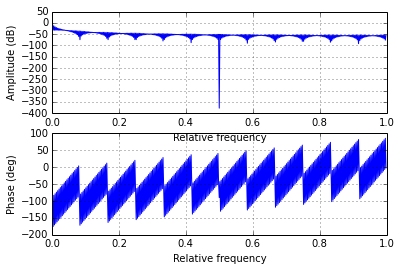

In [82]:
F.freqz()

In [86]:
sum(F.b)

1.0000000000000004

In [101]:
y = EnDet.apply(w)

In [102]:
y.y=y.y*dt*1000

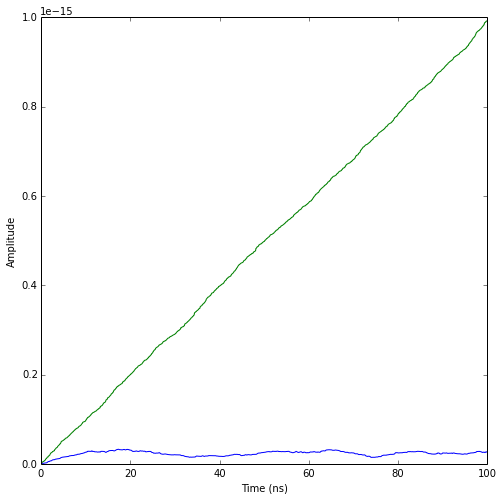

In [103]:
y.plot(typ='v')
Ei = (dt*np.cumsum(w.y*w.y))
plt.plot(w.x,Ei)

In [97]:
H=EnDet.filterT

In [ ]:
b = H.b

In [ ]:
len(b)

In [ ]:
len(w.x)

In [ ]:
EnDet

In [ ]:
EnDet._fsGHz